# Análise para input de dados  

- Construção...

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from IPython.display import Image
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
# Ler o arquivo
# Resultado do 01.1_tratamento_filtros_dados_renda.ipynb
df_renda = pd.read_csv("../../../dados/amostra_sicli_tratada/cli_renda_amostra_regras_tratamento.csv", sep=';')
df_renda.shape

(2382027, 13)

In [4]:
df_renda.columns

Index(['nu_pessoa', 'dt_nascimento', 'ic_tipo_renda', 'vr_renda_bruta',
       'vr_renda_liquida', 'ic_infmo_renda', 'dt_apuracao_renda', 'ic_sexo',
       'ic_situacao', 'ic_inconsistencia', 'nu_estdo_civil_p27', 'idade',
       'valido'],
      dtype='object')

In [8]:
features.remove("ic_infmo_renda")

ValueError: list.remove(x): x not in list

In [9]:
features

['dt_apuracao_renda',
 'ic_sexo',
 'ic_tipo_renda',
 'ic_situacao',
 'nu_estdo_civil_p27',
 'idade',
 'valido']

In [5]:
# Definição das features (inputs) e label (target)
# Todas as features
features = [#'dt_nascimento', 'vr_renda_bruta', 'vr_renda_liquida', 
            'ic_infmo_renda', 'dt_apuracao_renda', 'ic_sexo', 'ic_tipo_renda',
            'ic_situacao', 'nu_estdo_civil_p27', 'idade', 'valido']

# features e label ic_sexo
feat="ic_sexo"
features_sexo = features.copy().remove(feat).remove("valido")
label_ic_sexo     = [feat]

# features e label ic_tipo_renda
feat="ic_tipo_renda"
features_tp_renda = features.copy().remove(feat).remove("valido")
label_tp_renda    = [feat]

# features e label ic_infmo_renda
feat="ic_infmo_renda"
features_infmo_renda = features.copy().remove(feat).remove("valido")
label_infmo_renda = [feat]

# features e label dt_apuracao_renda
feat='dt_apuracao_renda'
features_dt_apuracao = features.copy().remove(feat).remove("valido")
label_dt_apuracao = [feat]

In [6]:
df_validos   = df_renda[df_renda['valido'] == True]
df_invalidos = df_renda[df_renda['valido'] == False]

print('Válidos:   ', df_validos.shape)
print('Inválidos: ', df_invalidos.shape)

Válidos:    (1221998, 13)
Inválidos:  (1160029, 13)


# ic_sexo

In [7]:
print('Válidos:')
print(df_validos['ic_sexo'].value_counts())
print('Inválidos:')
print(df_invalidos['ic_sexo'].value_counts())

Válidos:
M    617715
F    603686
?       597
Name: ic_sexo, dtype: int64
Inválidos:
M    629606
F    526174
?      4249
Name: ic_sexo, dtype: int64


### Inconsistências em ic_sexo
- `? = 597` nos registros válidos
- `? = 4249` nos registros inválidos
- Total: `4846` inválidos
- Serão separados os registros em dois conjuntos de dados
    - df_ic_sexo_treino contendo os `M` e `F` válidos que serão usados para treino e validação.
    - df_ic_sexo_inferir contendo os `4846` registros que serão inferidos pelo modelo treinado.

In [8]:
# registros consistentes
df_ic_sexo_treino  = df_validos[df_validos['ic_sexo'] != '?']

# df_renda será usado porque existem registros INCONSISTENTES de
# ic_sexo em ambos datasets (válidos e inválidos)
df_ic_sexo_inferir = df_renda[df_renda['ic_sexo'] == '?']
print('Treino:  ', df_ic_sexo_treino.shape)
print('Inferir: ', df_ic_sexo_inferir.shape)

Treino:   (1221401, 13)
Inferir:  (4846, 13)


# ic_tipo_renda

In [9]:
print('Válidos:')
print(df_validos['ic_tipo_renda'].value_counts())
print('Inválidos:')
print(df_invalidos['ic_tipo_renda'].value_counts())

Válidos:
F    729319
I    492679
Name: ic_tipo_renda, dtype: int64
Inválidos:
?    658335
F    398215
I    103479
Name: ic_tipo_renda, dtype: int64


### Inconsistências em ic_tipo_renda
- `? = 658335` registros inválidos
- Serão separados os registros em dois conjuntos de dados
    - df_ic_tipo_renda_treino contendo os `F` e `I` válidos que serão usados para treino e validação.
    - df_ic_tipo_renda_inferir contendo os `658335` registros que serão inferidos pelo modelo treinado.

In [10]:
# registros consistentes
df_ic_tipo_renda_treino  = df_validos

# registros INCONSISTENTES
df_ic_tipo_renda_inferir = df_invalidos[df_invalidos['ic_tipo_renda'] == '?']
print('Treino:  ', df_ic_tipo_renda_treino.shape)
print('Inferir: ', df_ic_tipo_renda_inferir.shape)

Treino:   (1221998, 13)
Inferir:  (658335, 13)


# ic_infmo_renda

In [11]:
print('Válidos:')
print(df_validos['ic_infmo_renda'].value_counts())
print('Inválidos:')
print(df_invalidos['ic_infmo_renda'].value_counts())

Válidos:
2.0    538634
6.0    344764
3.0    292274
5.0     46326
Name: ic_infmo_renda, dtype: int64
Inválidos:
0.0    658335
5.0    221813
3.0    106344
6.0     92123
2.0     81414
Name: ic_infmo_renda, dtype: int64


### Inconsistências em ic_infmo_renda
- `0.0 = 658335` registros inválidos
- Serão separados os registros em dois conjuntos de dados
    - df_ic_infmo_renda_treino contendo os registros válidos que serão usados para treino e validação.
    - df_ic_infmo_renda_inferir contendo os `658335` registros que serão inferidos pelo modelo treinado.

In [12]:
# registros consistentes
df_ic_infmo_renda_treino  = df_validos

# registros INCONSISTENTES
df_ic_infmo_renda_inferir = df_invalidos[df_invalidos['ic_infmo_renda'] == 0]
print('Treino:  ', df_ic_infmo_renda_treino.shape)
print('Inferir: ', df_ic_infmo_renda_inferir.shape)

Treino:   (1221998, 13)
Inferir:  (658335, 13)


# dt_apuracao_renda

In [13]:
print('Válidos:')
print((df_validos['dt_apuracao_renda'] == 0).value_counts())
print('Inválidos:')
print((df_invalidos['dt_apuracao_renda'] == 0).value_counts())

Válidos:
False    1221998
Name: dt_apuracao_renda, dtype: int64
Inválidos:
True     767164
False    392865
Name: dt_apuracao_renda, dtype: int64


### Inconsistências em dt_apuracao_renda
- Em **Inválidos** `True = 767164` são registros **inconsistentes**, no caso sem dt_apuracao_renda
- Serão separados os registros em dois conjuntos de dados
    - df_dt_apuracao_renda_treino contendo os registros válidos que serão usados para treino e validação.
    - df_dt_apuracao_renda_inferir contendo os `767164` registros que serão inferidos pelo modelo treinado.

# Modelo de classificação

## Gera amostragem conforme a calculadora:  
https://www.solvis.com.br/calculos-de-amostragem/  

- **Calculadora 2**
    - População: 1.741.828
    - Margem de erro (%): 1
    - Confiabilidade (%): 99
    - Tamanho da Amostra: 16419

In [14]:
df_features = df_ic_sexo_treino[features_sexo]
df_label    = df_ic_sexo_treino[label_ic_sexo]

print(df_features.shape)
print(df_label.shape)

(1221401, 6)
(1221401, 1)


In [15]:
df_features

,ic_infmo_renda,dt_apuracao_renda,ic_tipo_renda,ic_situacao,nu_estdo_civil_p27,idade
0,2.0,201710,I,1,9,66
1,6.0,201709,F,1,9,34
2,6.0,201709,F,1,9,34
3,2.0,201511,I,1,9,52
4,2.0,201702,I,1,1,47
...,...,...,...,...,...,...
1221993,2.0,201412,I,1,1,24
1221994,2.0,201603,I,1,9,53
1221995,6.0,201509,F,1,9,55
1221996,3.0,201510,F,1,1,29


In [16]:
# Amostra extratificada pela faixa de renda líquida.
from sklearn.model_selection import train_test_split

X, y = df_features[features_sexo], df_label[label_ic_sexo]
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.003, #0.013441941,
                      random_state=42,
                      stratify=y)

del X_train
del y_train

#print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3665, 6) (3665, 1)


#### `X` e `y` correspondem as variáveis independentes e dependente, respectivamente.
#### Estudo de qual dos modelos será o que melhor se aplica ao problema.

In [17]:
X = X_test
y = y_test

del X_test, y_test

print(X.shape,y.shape)

(3665, 6) (3665, 1)


A amostra contém 16419 resgistros. Essa amostra será dividida no conjunto de dados para o `treino` e `teste`

### Quantidade de registros por ic_sexo

In [18]:
y['ic_sexo'].value_counts()

M    1854
F    1811
Name: ic_sexo, dtype: int64

In [19]:
# Divisão do dataset em porções train e test.
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.33,
                      shuffle=True,
                      random_state=42,
                      stratify=y)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2455, 6) (2455, 1)
(1210, 6) (1210, 1)


- 11000 amostras para o treinamento dos modelos
- 5419 amostras para a validação da acurácia dos modelos

# Transforma em números (encoding) as variáveis categóricas

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
### ic_sexo 1 = M e 0 = F ###
###################################
le = le.fit(y_train['ic_sexo'])
y_train['ic_sexo'] = le.transform(y_train['ic_sexo'])

# aplica no y_test
le = le.fit(y_test['ic_sexo'])
y_test['ic_sexo'] = le.transform(y_test['ic_sexo'])

### encoding das variáveis categóricas ###
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(X_train['ic_tipo_renda'])
X_train['ic_tipo_renda'] = le.transform(X_train['ic_tipo_renda'])

# aplica no X_test
le = le.fit(X_test['ic_tipo_renda'])
X_test['ic_tipo_renda'] = le.transform(X_test['ic_tipo_renda'])
###################################

#print(y_train.ic_sexo.value_counts())

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

## Conjunto de bibliotecas usadas na preparação, treinamento e na validação dos modelos de classificação

In [21]:
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

## Algoritmos de classificação que serão utilizados

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

Definição de quantidade de folds, definição da seed a ser utilizada, e definição da métrica de avaliação. K-fold é um método de treinamento a ser usado em conjuntos de dados de tamanho moderado devido ao seu treinamento consumir bastante tempo.  
Referência: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html, https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [23]:
print(X_train.shape)
print(y_train.shape)

(2455, 6)
(2455, 1)


In [24]:
X_train

,ic_infmo_renda,dt_apuracao_renda,ic_tipo_renda,ic_situacao,nu_estdo_civil_p27,idade
756383,3.0,200606,1,1,6,64
882771,3.0,202001,1,1,0,21
262293,6.0,201901,0,1,1,64
863929,6.0,201709,0,1,8,56
1032697,6.0,201706,0,1,9,59
...,...,...,...,...,...,...
930947,2.0,201902,0,1,1,38
385399,3.0,200408,0,1,1,40
13218,3.0,201808,1,1,3,40
482646,6.0,201802,0,1,1,30


In [25]:
y_train

,ic_sexo
756383,1
882771,0
262293,0
863929,1
1032697,0
...,...
930947,0
385399,1
13218,0
482646,1


# Parâmetros de configuração da validação por KFold

In [26]:
num_folds = 10
seed = 42
scoring = 'accuracy'

# Pipeline de avaliação de desempenho de técnicas/algoritmos para classificação supervisionada

In [27]:
# Verificação do score de cada algoritmo. Avaliação de desempenho de cada modelo.
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1)))
#models.append(('SVM', LinearSVC()))
models.append(('SVM', SVC(kernel='rbf', gamma=0.7, C=0.2)))
models.append(('ADT', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                         algorithm="SAMME",
                                         n_estimators=200)))
models.append(('XGB', XGBClassifier(DecisionTreeClassifier(max_depth=1),
                                         algorithm="SAMME",
                                         n_estimators=200)))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.524251 (0.021003)
LDA: 0.519355 (0.029446)
KNN: 0.522628 (0.025671)
CART: 0.528347 (0.028789)
NB: 0.528722 (0.036621)
RF: 0.556851 (0.040970)
SVM: 0.494135 (0.033378)
ADT: 0.544199 (0.038014)


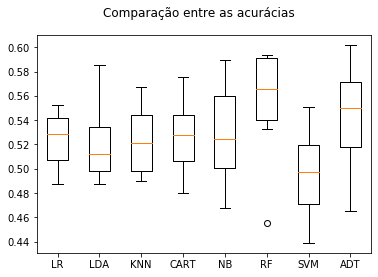

In [28]:
# Visualização das acurácias dos diferentes modelos.
fig = pyplot.figure()
fig.suptitle('Comparação entre as acurácias')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [29]:
# Padronização do dataset, utilizando StandardScaler
# Aplica normalização por z-score
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier(n_jobs=-1))])))
pipelines.append(('CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(max_depth=2, 
                                                                                             random_state=0, 
                                                                                             n_jobs=-1))])))
#pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', LinearSVC())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(kernel='rbf', 
                                                                            gamma=0.7, 
                                                                            C=0.2))])))
pipelines.append(('ADT', Pipeline([('Scaler', StandardScaler()),('ADT', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                                                                           algorithm="SAMME",
                                                                                           n_estimators=200))])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.519763 (0.029907)
LDA: 0.519355 (0.029446)
KNN: 0.508362 (0.027822)
CART: 0.523459 (0.032707)
NB: 0.528722 (0.037468)
RF: 0.556851 (0.040970)
SVM: 0.546647 (0.032609)
ADT: 0.544199 (0.038014)


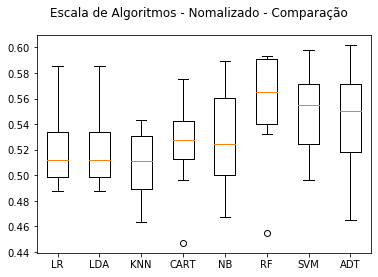

In [30]:
# Visualização das acurácias dos diferentes modelos pós-normalização do dataset.
fig = pyplot.figure()
fig.suptitle('Escala de Algoritmos - Nomalizado - Comparação')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [31]:
# Ajuste de parâmetros do modelo KNN. Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13]
param_grid = dict(n_neighbors=neighbors)

model = KNeighborsClassifier(n_jobs=-1)

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

grid_result = grid.fit(rescaledX, y_train)
#grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.516514 using {'n_neighbors': 10}
0.506755 (0.033820) with: {'n_neighbors': 1}
0.507953 (0.033177) with: {'n_neighbors': 2}
0.501047 (0.028445) with: {'n_neighbors': 3}
0.492086 (0.030938) with: {'n_neighbors': 4}
0.509582 (0.027207) with: {'n_neighbors': 5}
0.507558 (0.034524) with: {'n_neighbors': 6}
0.506323 (0.019757) with: {'n_neighbors': 7}
0.509185 (0.025691) with: {'n_neighbors': 8}
0.511220 (0.021207) with: {'n_neighbors': 9}
0.516514 (0.022885) with: {'n_neighbors': 10}
0.515683 (0.014674) with: {'n_neighbors': 11}
0.508359 (0.016693) with: {'n_neighbors': 12}
0.508357 (0.018028) with: {'n_neighbors': 13}


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
# Ajuste de parâmetros do modelo svm.SVC Kernel Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

C_range = np.logspace(-2, 2)
gamma_range = np.logspace(-3, 3)
param_grid = dict(gamma=gamma_range, C=C_range)

model = SVC(kernel='rbf')

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Ajuste de parâmetros do modelo ADT - AdaBoost Decison Tree Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators = [50,100,150,200,250]
learning_rate = [0.1, 0.5, 1.0]
algorithm = ['SAMME', 'SAMME.R']
param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm)

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
STOP

### Gera nova amostragem com 30% do dataset

In [ ]:
df_features = df_ic_sexo_treino[features_sexo]
df_label    = df_ic_sexo_treino[label_ic_sexo]

print(df_features.shape)
print(df_label.shape)

In [ ]:
df_label

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_features[features_sexo], df_label['ic_sexo']
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.3, ## -> 30% será usado para treinar e avaliar
                      random_state=42,
                      stratify=y)

X = X_test
y = y_test

del X_train, y_train, X_test, y_test

print (X.shape, y.shape)

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      #test_size=0.15, # 15% de 522.549 será usado para avaliar
                      test_size=0.3, # 30% de 522.549 será usado para avaliar
                      random_state=42, 
                      stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
###    ic_sexo 1 = M e 0 = F    ###
###################################
#le = le.fit(y_train['ic_sexo'])
#y_train['ic_sexo'] = le.transform(y_train['ic_sexo'])
le = le.fit(y_train)
y_train = le.transform(y_train)

# aplica no y_test
#le = le.fit(y_test['ic_sexo'])
#y_test['ic_sexo'] = le.transform(y_test['ic_sexo'])
le = le.fit(y_test)
y_test = le.transform(y_test)

# encoding das variáveis categóricas
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(X_train['ic_tipo_renda'])
X_train['ic_tipo_renda'] = le.transform(X_train['ic_tipo_renda'])

# aplica no X_test
le = le.fit(X_test['ic_tipo_renda'])
X_test['ic_tipo_renda'] = le.transform(X_test['ic_tipo_renda'])
###################################

#print(y_train.ic_sexo.value_counts())

In [ ]:
# Modelo final KNN - Best: 0.537727 using {'n_neighbors': 11}
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)

model_KNN = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)

#model_KNN.fit(rescaledX, y_train)
model_KNN.fit(X_train, y_train)

# Estima a acurácia no dataset de validação
#rescaledValidationX = scaler.transform(X_test)

#predictions = model_KNN.predict(rescaledValidationX)
predictions = model_KNN.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
# Modelo final - SVM Kernel Classifier 
# Best: ??
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_SVC = SVC(kernel='rbf', gamma=?, C=?)

model_SVC.fit(rescaledX, y_train)

# Estima a acurácia no dataset de validação
rescaledValidationX = scaler.transform(X_test)

#predictions = model_DT.predict(rescaledValidationX)
predictions = model_SVC.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
# Modelo final AdaBoost Decision Tree Classifier
# Best: ??
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_ADT =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                               algorithm="SAMME",
                               n_estimators=200)

model_ADT.fit(rescaledX, y_train)

# Estima a acurácia no dataset de validação
rescaledValidationX = scaler.transform(X_test)

predictions = model_ADT.predict(rescaledValidationX)
#predictions = model_RF.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
# Modelo final Naïve Bayes Gaussian Classifier
# Best: ??
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_NBG =  GaussianNB()

model_NBG.fit(rescaledX, y_train)

# Estima a acurácia no dataset de validação
rescaledValidationX = scaler.transform(X_test)

predictions = model_NBG.predict(rescaledValidationX)
#predictions = model_RF.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
STOP

# Execução do modelo KNN sobre todo o conjunto de dados
Observou-se uma forte capacidade de generalização do modelo, este apresentando resultados ainda melhores quando aplicado sobre o dataset completo.

In [ ]:
# Ler o arquivo
dataset = pd.read_csv("/home/marcello/Documentos/git/ibge-indicadores-censitarios/dados/notebook/pre_processing_cliente_renda_ibge/pre_processing_cliente_renda_ibge.csv", sep=';')
dataset.shape

In [ ]:
# conjunto de dados SEM renda
# será usado para inferir/estimar a faixa de renda
dataset_sem_renda = dataset[dataset['vr_renda_bruta'] == 0]

# conjunto de dados COM renda
# será usando para treinar os modelos a inferir/estimar a renda
dataset = dataset[dataset['vr_renda_bruta'] != 0]

In [ ]:
dataset_sem_renda.shape

### Com renda

In [ ]:
X, y = dataset[features], dataset['faixa_renda_bruta']
X.shape

### Sem renda

In [ ]:
X_sem_renda, y_sem_renda = dataset_sem_renda[features], dataset_sem_renda['faixa_renda_bruta']
X_sem_renda.shape

In [ ]:
# Encoding, com 2 = M, 1 = F, 0 = ?.
#Transformando campos tipo object em campos numéricos para aplicação dos modelos de classificação
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no X['ic_sexo']
le = le.fit(X['ic_sexo'])
X['ic_sexo'] = le.transform(X['ic_sexo'])

# aplica no X_sem_renda['ic_sexo']
le = le.fit(X_sem_renda['ic_sexo'])
X_sem_renda['ic_sexo'] = le.transform(X_sem_renda['ic_sexo'])

In [ ]:
# Quantidade de clientes por faixas COM renda
y.value_counts()

In [ ]:
# Quantidade de clientes por faixas SEM renda
y_sem_renda.value_counts()

Estima faixa de renda IBGE no conjunto que possui alguma renda no SICLI

In [ ]:
faixa_renda_estimada = model_KNN.predict(X)

print(accuracy_score(y, faixa_renda_estimada))
print(confusion_matrix(y, faixa_renda_estimada))
print(classification_report(y, faixa_renda_estimada))
                            
dataset['faixa_renda_estimada'] = faixa_renda_estimada
dataset[features_comparar]

- Para provar que o modelo KNN original (acima) está adequado, foram aplicadas duas técnicas de otimização por Resampling. O intuito é identificar a possibilidade de melhoria e se de fato o modelo está generalizando e produzindo os melhores resultados.

- Após aplicar as técnicas de resampling (abaixo) foi constatado que o modelo KNN original de fato produziu os melhores resultados, pois após comparar as métricas `precision`, `recall` e `f1-score` constatou-se que o modelo KNN original **sem resampling** melhorou os scores aṕos ser aplicado sobre todo o conjunto de dados.


Estima faixa de renda IBGE no conjunto **SEM renda** no SICLI

In [ ]:
faixa_renda_estimada = model_KNN.predict(X_sem_renda)

print(accuracy_score(y_sem_renda, faixa_renda_estimada))
print(confusion_matrix(y_sem_renda, faixa_renda_estimada))
print(classification_report(y_sem_renda, faixa_renda_estimada))
                            
dataset_sem_renda['faixa_renda_estimada'] = faixa_renda_estimada
dataset_sem_renda[features_comparar]

## Otimização por Resampling

Técnicas de resampling podem ser utilizadas quando existe um desbalanço entre classes. No caso da classe faixa de renda, existem muito mais registros da classe 0 do que das classes 6 e 7. Para compensar esta disparidade no dataset de forma a não prejudicar o modelo, podem ser utilizadas técnicas de resampling. Abaixo foi utilizado undersampling por Tomek Links e Neighborhood Cleaning Rows. 
Referência: https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/

In [ ]:
from sklearn.model_selection import train_test_split

X, y = dataset[features], dataset['faixa_renda_bruta']
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.3, ## -> 30% será usado para treinar e avaliar o modelo KNN
                      random_state=42,
                      stratify=y)

X = X_test
y = y_test

del X_train, y_train, X_test, y_test

print (X.shape, y.shape)

In [ ]:
#encoding, com 2 = M, 1 = F, 0 = ?
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no X_train
le = le.fit(X['ic_sexo'])
X['ic_sexo'] = le.transform(X['ic_sexo'])

X.ic_sexo.value_counts()

## Aplica undersampling usando heurística TomekLinks
- https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/under-sampling/plot_illustration_tomek_links.html

In [ ]:
from imblearn.under_sampling import TomekLinks
undersample = TomekLinks(n_jobs=-1)
X_train_tml, y_train_tml = undersample.fit_resample(X, y)

X_train_tml.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
     train_test_split(X_train_tml, y_train_tml,
                      test_size=0.3, # 30% de 518.834 será usado para avaliar o modelo
                      random_state=42, 
                      stratify=y_train_tml)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)

model_KNN_tml = KNeighborsClassifier(n_neighbors=1)

#model_KNN_tml.fit(rescaledX, y_train)
model_KNN_tml.fit(X_train, y_train)

# Estima a acurácia no dataset de validação
#rescaledValidationX = scaler.transform(X_test)

#predictions = model_KNN_tml.predict(rescaledValidationX)
predictions = model_KNN_tml.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

## Estimar faixa de renda sobre todo o conjunto de dados  
- Utilizado o dataset sobre o qual foi aplicado undersampling por Tomek Links

In [ ]:
X, y = dataset[features], dataset['faixa_renda_bruta']

In [ ]:
#encoding, com 2 = M, 1 = F, 0 = ?
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no X['ic_sexo']
le = le.fit(X['ic_sexo'])
X['ic_sexo'] = le.transform(X['ic_sexo'])

In [ ]:
faixa_renda_estimada = model_KNN_tml.predict(X)

print(accuracy_score(y, faixa_renda_estimada))
print(confusion_matrix(y, faixa_renda_estimada))
print(classification_report(y, faixa_renda_estimada))

dataset['faixa_renda_estimada'] = faixa_renda_estimada
dataset[features_comparar]

**sem renda**

In [ ]:
faixa_renda_estimada = model_KNN_tml.predict(X_sem_renda)

print(accuracy_score(y_sem_renda, faixa_renda_estimada))
print(confusion_matrix(y_sem_renda, faixa_renda_estimada))
print(classification_report(y_sem_renda, faixa_renda_estimada))

dataset_sem_renda['faixa_renda_estimada'] = faixa_renda_estimada
dataset_sem_renda[features_comparar]

## Aplica undersampling usando heurística NeighbourhoodCleaningRule  
- https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.NeighbourhoodCleaningRule.html  

In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule(n_jobs=-1)
X_train_ncr, y_train_ncr = ncr.fit_resample(X,y)

X_train_ncr.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
     train_test_split(X_train_ncr, y_train_ncr,
                      #test_size=0.15, # 15% 
                      test_size=0.30, # 30% 
                      random_state=42, 
                      stratify=y_train_ncr)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)

model_KNN_ncr = KNeighborsClassifier(n_neighbors=1)

#model_KNN_ncr.fit(rescaledX, y_train)
model_KNN_ncr.fit(X_train, y_train)

# Estima a acurácia no dataset de validação
#rescaledValidationX = scaler.transform(X_test)

#predictions = model_KNN_ncr.predict(rescaledValidationX)
predictions = model_KNN_ncr.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

## Estimar faixa de renda sobre todo o conjunto de dados
- Utilizado o dataset sobre o qual foi aplicado undersampling por NeighbourhoodCleaningRule

In [ ]:
X, y = dataset[features], dataset['faixa_renda_bruta']

In [ ]:
#encoding, com 2 = M, 1 = F, 0 = ?
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no X['ic_sexo']
le = le.fit(X['ic_sexo'])
X['ic_sexo'] = le.transform(X['ic_sexo'])

In [ ]:
faixa_renda_estimada = model_KNN_ncr.predict(X)

print(accuracy_score(y, faixa_renda_estimada))
print(confusion_matrix(y, faixa_renda_estimada))
print(classification_report(y, faixa_renda_estimada))

dataset['faixa_renda_estimada'] = faixa_renda_estimada
dataset[features_comparar]

**sem renda**

In [ ]:
faixa_renda_estimada = model_KNN_ncr.predict(X_sem_renda)

print(accuracy_score(y_sem_renda, faixa_renda_estimada))
print(confusion_matrix(y_sem_renda, faixa_renda_estimada))
print(classification_report(y_sem_renda, faixa_renda_estimada))

dataset_sem_renda['faixa_renda_estimada'] = faixa_renda_estimada
dataset_sem_renda[features_comparar]

### Aplica under e over sampling usando heurística SMOTETomek
- https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html#imblearn.combine.SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

stn = SMOTETomek(n_jobs=-1)
X_train_stn, y_train_stn = stn.fit_resample(X,y)

X_train_stn.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
     train_test_split(X_train_stn, y_train_stn,
                      #test_size=0.15, # 15% de 507.854 será usado para avaliar o modelo eleito
                      test_size=0.30, # 30% de 507.854 será usado para avaliar o modelo eleito
                      random_state=42, 
                      stratify=y_train_stn)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
model_KNN_stn = KNeighborsClassifier(n_neighbors=1)

model_KNN_stn.fit(X_train, y_train)

# Estima a acurácia no dataset de validação
#rescaledValidationX = scaler.transform(X_test)

predictions = model_KNN_stn.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

## Estimar faixa de renda sobre todo o conjunto de dados
- Utilizado o dataset sobre o qual foi aplicado under e over sampling usando heurística SMOTEENN

In [ ]:
X, y = dataset[features], dataset['faixa_renda_bruta']

In [ ]:
#encoding, com 2 = M, 1 = F, 0 = ?
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no X['ic_sexo']
le = le.fit(X['ic_sexo'])
X['ic_sexo'] = le.transform(X['ic_sexo'])

In [ ]:
faixa_renda_estimada = model_KNN_stn.predict(X)

print(accuracy_score(y, faixa_renda_estimada))
print(confusion_matrix(y, faixa_renda_estimada))
print(classification_report(y, faixa_renda_estimada))

dataset['faixa_renda_estimada'] = faixa_renda_estimada
dataset[features_comparar]

#### sem renda

In [ ]:
faixa_renda_estimada = model_KNN_stn.predict(X_sem_renda)

print(accuracy_score(y_sem_renda, faixa_renda_estimada))
print(confusion_matrix(y_sem_renda, faixa_renda_estimada))
print(classification_report(y_sem_renda, faixa_renda_estimada))

dataset_sem_renda['faixa_renda_estimada'] = faixa_renda_estimada
dataset_sem_renda[features_comparar]

Foi verificada uma leve perda de precisão aplicadas as técnicas de resampling, desta forma será utilizado o modelo sem a utilização destas técnicas